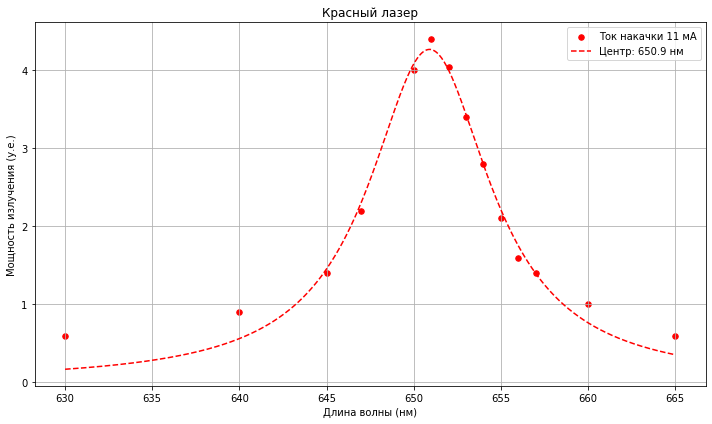

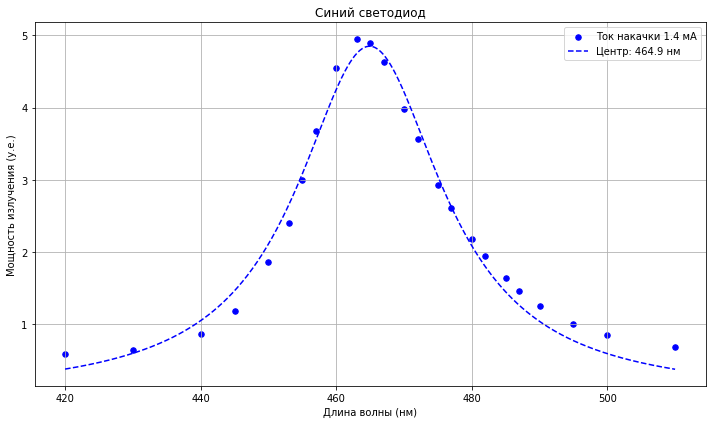

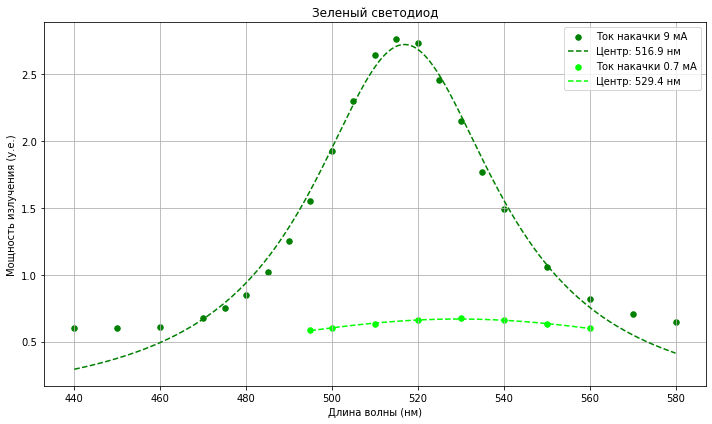

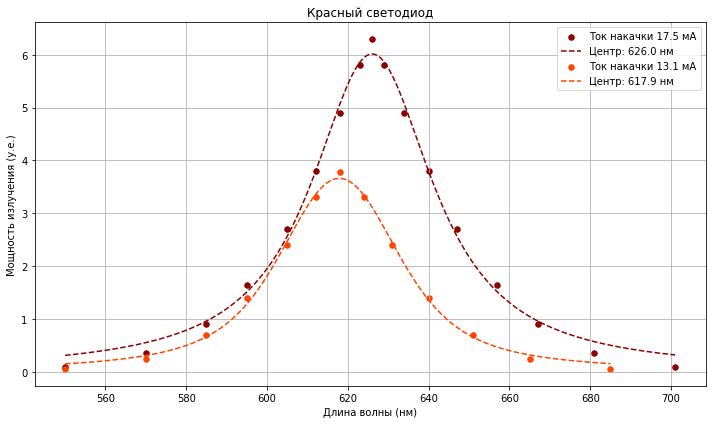

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import voigt_profile

# Данные
laser_data = {'current': 11, 'lambda': np.array([630, 640, 645, 647, 650, 651, 652, 653, 654, 655, 656, 657, 660, 665]), 'V': np.array([0.6, 0.9, 1.4, 2.2, 4, 4.4, 4.04, 3.4, 2.8, 2.1, 1.6, 1.4, 1, 0.6])}
blue_data = {'current': 1.4, 'lambda': np.array([420, 430, 440, 445, 450, 455, 453, 457, 460, 463, 465, 467, 470, 472, 475, 477, 480, 482, 485, 487, 490, 495, 500, 510]), 'V': np.array([0.59, 0.64, 0.86, 1.18, 1.86, 3, 2.4, 3.67, 4.55, 4.95, 4.9, 4.63, 3.98, 3.56, 2.93, 2.61, 2.18, 1.94, 1.64, 1.46, 1.25, 1, 0.85, 0.69])}
green1_data = {'current': 9, 'lambda': np.array([440, 450, 460, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 550, 560, 570, 580]), 'V': np.array([0.6, 0.6, 0.61, 0.68, 0.75, 0.85, 1.02, 1.25, 1.55, 1.92, 2.3, 2.64, 2.76, 2.73, 2.45, 2.15, 1.77, 1.49, 1.06, 0.82, 0.71, 0.65])}
green2_data = {'current': 0.7, 'lambda': np.array([495, 500, 510, 520, 530, 540, 550, 560]), 'V': np.array([0.59, 0.6, 0.63, 0.66, 0.68, 0.66, 0.63, 0.6])}
red1_data = {'current': 17.5, 'lambda': np.array([550,570,585,595,605,612,618,623,626,629,634,640,647,657,667,681,701]), 'V': np.array([0.10,0.35,0.90,1.65,2.70,3.80,4.90,5.80,6.30,5.80,4.90,3.80,2.70,1.65,0.90,0.35,0.10])}
red2_data = {'current': 13.1, 'lambda': np.array([550,570,585,595,605,612,618,624,631,640,651,665,685]), 'V': np.array([0.05,0.25,0.70,1.40,2.40,3.30,3.78,3.30,2.40,1.40,0.70,0.25,0.05])}

# Функция Фойгта
def voigt(x, amp, cen, sigma, gamma):
    return amp * voigt_profile(x - cen, sigma, gamma)

# Функция для построения одного графика
def plot_spectrum(data1, data2, title, color1, color2):
    plt.figure(figsize=(10, 6))
    
    # Первый набор данных
    plt.scatter(data1['lambda'], data1['V'], color=color1, s=30, 
                label=f'Ток накачки {data1["current"]} мА')
    
    # Аппроксимация первого набора
    if len(data1['lambda']) > 3:
        try:
            popt, _ = curve_fit(voigt, data1['lambda'], data1['V'], 
                              p0=[max(data1['V']), data1['lambda'][np.argmax(data1['V'])], 5, 5],
                              maxfev=10000)
            x_fit = np.linspace(min(data1['lambda']), max(data1['lambda']), 500)
            plt.plot(x_fit, voigt(x_fit, *popt), color=color1, linestyle='--',
                    label=f'Центр: {popt[1]:.1f} нм')
        except Exception as e:
            print(f"Ошибка аппроксимации для {title}: {e}")
    
    # Второй набор данных (если есть)
    if data2 is not None:
        plt.scatter(data2['lambda'], data2['V'], color=color2, s=30, 
                   label=f'Ток накачки {data2["current"]} мА')
        
        # Аппроксимация второго набора
        if len(data2['lambda']) > 3:
            try:
                popt, _ = curve_fit(voigt, data2['lambda'], data2['V'], 
                                  p0=[max(data2['V']), data2['lambda'][np.argmax(data2['V'])], 5, 5],
                                  maxfev=10000)
                x_fit = np.linspace(min(data2['lambda']), max(data2['lambda']), 500)
                plt.plot(x_fit, voigt(x_fit, *popt), color=color2, linestyle='--', label=f'Центр: {popt[1]:.1f} нм')
            except Exception as e:
                print(f"Ошибка аппроксимации для {title} (2 ток): {e}")
    
    plt.title(title)
    plt.xlabel('Длина волны (нм)')
    plt.ylabel('Мощность излучения (у.е.)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Строим 4 отдельных графика
plot_spectrum(laser_data, None, 'Красный лазер', 'red', None)
plot_spectrum(blue_data, None, 'Синий светодиод', 'blue', None)
plot_spectrum(green1_data, green2_data, 'Зеленый светодиод', 'green', 'lime')
plot_spectrum(red1_data, red2_data, 'Красный светодиод', 'darkred', 'orangered')

In [37]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import voigt_profile

def calculate_spectral_properties(wavelengths, intensities):
    """Вычисляет центр спектра и FWHM для набора данных"""
    # Нормализуем интенсивности
    norm_int = intensities / np.max(intensities)
    
    # Находим центр (максимум спектра)
    center_idx = np.argmax(norm_int)
    center = wavelengths[center_idx]
    
    # Находим FWHM
    half_max = 0.5
    left_idx = np.where(norm_int[:center_idx] <= half_max)[0]
    right_idx = np.where(norm_int[center_idx:] <= half_max)[0]
    
    if len(left_idx) > 0 and len(right_idx) > 0:
        left = np.interp(half_max, 
                        norm_int[left_idx[-1]:center_idx+1], 
                        wavelengths[left_idx[-1]:center_idx+1])
        right = np.interp(half_max, 
                         norm_int[center_idx:center_idx+right_idx[0]+1][::-1], 
                         wavelengths[center_idx:center_idx+right_idx[0]+1][::-1])
        fwhm = right - left
    else:
        fwhm = np.nan
    
    return center, fwhm

# Данные из вашего эксперимента (сгруппированы по образцам)
data_sets = {
    "Красный лазер": {
        "current": 11.0,
        "lambda": np.array([630, 640, 645, 647, 650, 651, 652, 653, 654, 655, 656, 657, 660, 665]),
        "V": np.array([0.6, 0.9, 1.4, 2.2, 4, 4.4, 4.04, 3.4, 2.8, 2.1, 1.6, 1.4, 1, 0.6])
    },
    "Синий светодиод": {
        "current": 1.4,
        "lambda": np.array([420, 430, 440, 445, 450, 455, 453, 457, 460, 463, 465, 467, 470, 472, 475, 477, 480, 482, 485, 487, 490, 495, 500, 510]),
        "V": np.array([0.59, 0.64, 0.86, 1.18, 1.86, 3, 2.4, 3.67, 4.55, 4.95, 4.9, 4.63, 3.98, 3.56, 2.93, 2.61, 2.18, 1.94, 1.64, 1.46, 1.25, 1, 0.85, 0.69])
    },
    "Зелёный светодиод (9 мА)": {
        "current": 9.0,
        "lambda": np.array([440, 450, 460, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 550, 560, 570, 580]),
        "V": np.array([0.6, 0.6, 0.61, 0.68, 0.75, 0.85, 1.02, 1.25, 1.55, 1.92, 2.3, 2.64, 2.76, 2.73, 2.45, 2.15, 1.77, 1.49, 1.06, 0.82, 0.71, 0.65])
    },
    "Зелёный светодиод (0.7 мА)": {
        "current": 0.7,
        "lambda": np.array([495, 500, 510, 520, 530, 540, 550, 560]),
        "V": np.array([0.59, 0.6, 0.63, 0.66, 0.68, 0.66, 0.63, 0.6])
    },
    "Красный светодиод (17.5 мА)": {
        "current": 17.5,
        # "lambda": np.array([570, 580, 590, 600, 605, 610, 613, 615, 616, 620, 622, 623, 624, 625, 628, 630, 633, 635, 637, 640, 645]),
        # "V": np.array([0.65, 0.71, 0.89, 1.01, 1.13, 1.31, 1.43, 1.55, 1.67, 1.61, 1.55, 1.43, 1.37, 1.07, 0.95, 0.83, 0.71, 0.65, 0.6, 0.6, 0.59])
       'lambda': np.array([550,570,585,595,605,612,618,623,626,629,634,640,647,657,667,681,701]),
        'V': np.array([0.10,0.35,0.90,1.65,2.70,3.80,4.90,5.80,6.30,5.80,4.90,3.80,2.70,1.65,0.90,0.35,0.10])

    },
    "Красный светодиод (13.1 мА)": {
        "current": 13.1,
        # "lambda": np.array([610, 615, 620, 624, 626, 628, 630, 635, 640]),
        # "V": np.array([0.6, 0.6, 3.6, 6.8, 15.6, 21.6, 21.6, 15.8, 4, 3.2, 2.1, 1.2, 0.6])

        'lambda': np.array([550,570,585,595,605,612,618,624,631,640,651,665,685]),
        'V': np.array([0.05,0.25,0.70,1.40,2.40,3.30,3.78,3.30,2.40,1.40,0.70,0.25,0.05])
    }
}

# Вычисляем параметры для всех наборов данных
results = []
for name, data in data_sets.items():
    center, fwhm = calculate_spectral_properties(data["lambda"], data["V"])
    results.append({
        "name": name.split(" (")[0],
        "current": data["current"],
        "center": round(center, 1),
        "fwhm": round(fwhm, 1) if not np.isnan(fwhm) else "N/A"
    })

# Генерация LaTeX таблицы
latex_table = """\\begin{table}[h!]
\\centering
\\caption{Основные спектральные характеристики исследуемых образцов}
\\label{tab:spectral_properties}
\\begin{tabular}{|l|c|c|c|}
\\hline
\\textbf{Образец} & \\textbf{Ток накачки, мА} & \\textbf{$\\lambda_{max}$, нм} & \\textbf{FWHM, нм} \\\\
\\hline
"""

# Добавляем данные в таблицу
for res in results:
    latex_table += f"{res['name']} & {res['current']} & {res['center']} & {res['fwhm']} \\\\\n\\hline\n"

latex_table += """\\end{tabular}
\\end{table}"""

print(latex_table)

\begin{table}[h!]
\centering
\caption{Основные спектральные характеристики исследуемых образцов}
\label{tab:spectral_properties}
\begin{tabular}{|l|c|c|c|}
\hline
\textbf{Образец} & \textbf{Ток накачки, мА} & \textbf{$\lambda_{max}$, нм} & \textbf{FWHM, нм} \\
\hline
Красный лазер & 11.0 & 651 & 7.9 \\
\hline
Синий светодиод & 1.4 & 463 & 24.7 \\
\hline
Зелёный светодиод & 9.0 & 515 & 50.4 \\
\hline
Зелёный светодиод & 0.7 & 530 & N/A \\
\hline
Красный светодиод & 17.5 & 626 & 36.3 \\
\hline
Красный светодиод & 13.1 & 618 & 35.7 \\
\hline
\end{tabular}
\end{table}


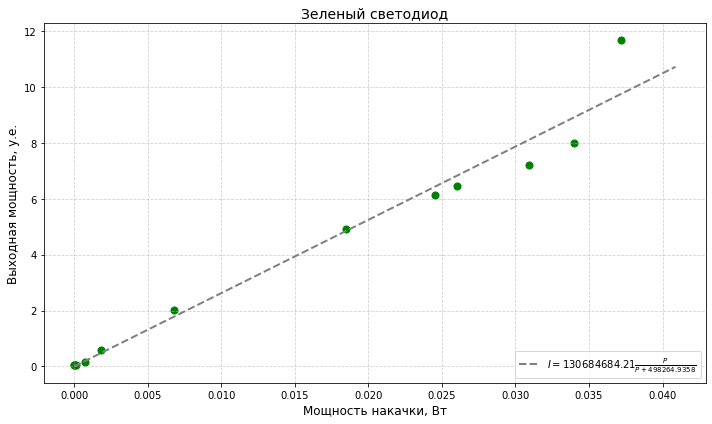

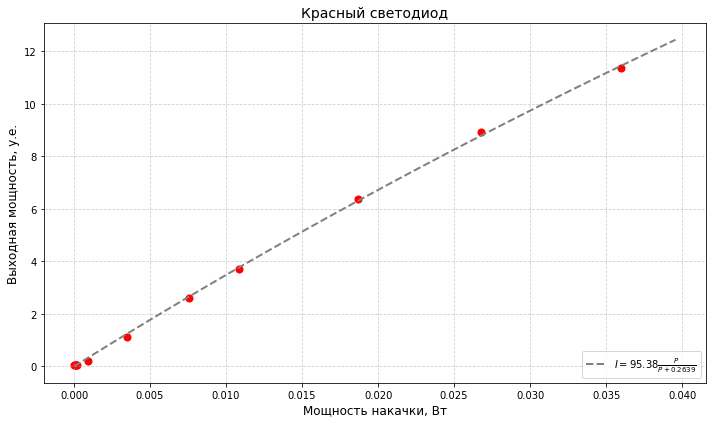

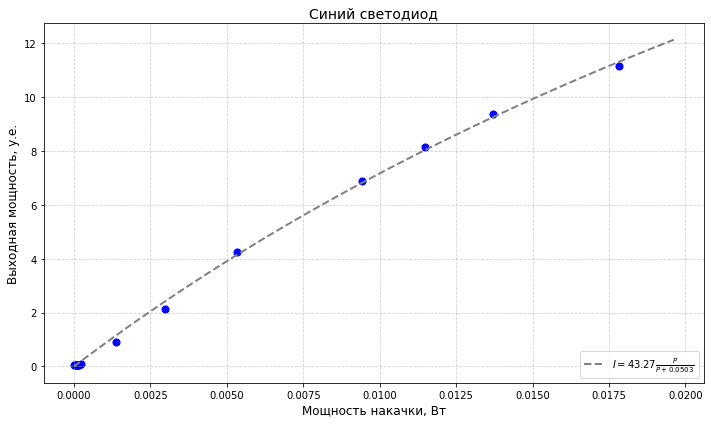

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


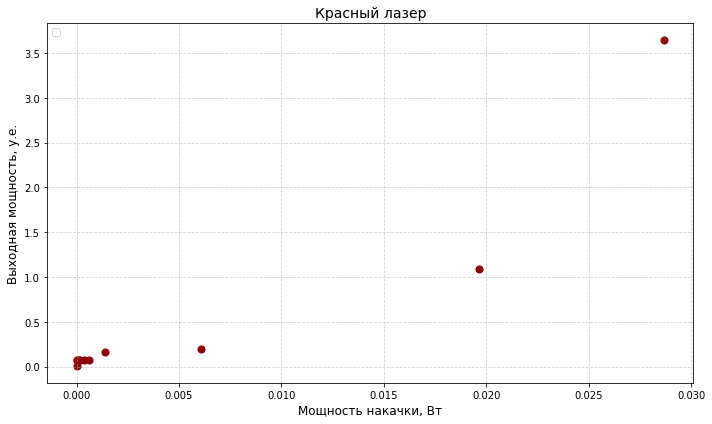

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Данные для зеленого светодиода
P_out_green = np.array([0.07, 0.07, 0.07, 0.07, 0.16, 0.59, 2.02, 4.93, 6.15, 6.45, 7.22, 8, 11.69])
P_in_green = np.array([0, 0.0001*0.2461, 0.0001*0.4045, 0.0001*1.09, 0.0003*2.4275, 
                      0.0007*2.5758, 0.0025*2.7195, 0.0065*2.8455, 0.0085*2.8823, 
                      0.009*2.8903, 0.0106*2.9195, 0.0116*2.9318, 0.0123*3.0213])

# Данные для красного светодиода
P_out_red_led = np.array([0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.22, 1.12, 2.61, 3.71, 6.38, 8.91, 11.36])
P_in_red_led = np.array([0.0001*0.0007, 0.0001*0.3148, 0.0001*0.5562, 0.0001*0.9118, 
                        0.0001*1.1785, 0.0001*1.849, 0.0004*2.2592, 0.0013*2.7052, 
                        0.0025*3.0257, 0.0034*3.1956, 0.0054*3.4644, 0.0073*3.6703, 
                        0.0094*3.8264])

# Данные для синего светодиода
P_out_blue = np.array([0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.08, 0.9, 2.14, 4.25, 6.9, 8.14, 9.38, 11.18])
P_in_blue = np.array([0.0001*0.0007, 0.0001*0.2552, 0.0001*0.5838, 0.0001*0.7932, 
                     0.0001*1.0014, 0.0001*1.3262, 0.0001*1.4147, 0.0001*1.7967, 
                     0.0001*2.3572, 0.0005*2.7453, 0.001*2.9888, 0.0016*3.3429, 
                     0.0025*3.7681, 0.0029*3.9644, 0.0033*4.1575, 0.004*4.4593])

# Данные для красного лазера
P_out_laser = np.array([0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.16, 0.2, 1.09, 3.65, 0.0005096])
P_in_laser = np.array([0.0001*0.0006, 0.0001*0.2249, 0.0002*0.5826, 0.0002*0.9588, 
                      0.0003*1.1549, 0.0004*1.4698, 0.0008*1.7326, 0.0032*1.8986, 
                      0.0096*2.0471, 0.0132*2.172, 1.26e-05*0.0032122])

# Функция аппроксимации для светодиодов: I = I0*P/(P + Psat)
def led_func(P, I0, Psat):
    return I0 * P / (P + Psat)

# Функция аппроксимации для лазера: I = a*(P - P_thr)
def laser_func(P, a, P_thr):
    return a * (P - P_thr)

# Функция для построения графика светодиода
def plot_led_curve(P_in, P_out, title, color):
    plt.figure(figsize=(10, 6))
    plt.scatter(P_in, P_out, color=color, s=50)
    
    # Аппроксимация (исключаем нулевую точку)
    mask = P_in > 0
    try:
        popt, pcov = curve_fit(led_func, P_in[mask], P_out[mask], 
                              p0=[max(P_out), 0.01], maxfev=5000)
        
        x_fit = np.linspace(0, max(P_in)*1.1, 100)
        y_fit = led_func(x_fit, *popt)
        
        plt.plot(x_fit, y_fit, '--', color='grey', linewidth=2,
                label=f'$I={popt[0]:.2f}\\frac{{P}}{{P+{popt[1]:.4f}}}$')
        
    except Exception as e:
        print(f"Ошибка аппроксимации для {title}: {e}")
    
    plt.xlabel('Мощность накачки, Вт', fontsize=12)
    plt.ylabel('Выходная мощность, у.е.', fontsize=12)
    plt.title(title, fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(fontsize=10, loc='lower right')
    plt.tight_layout()
    plt.show()

# Функция для построения графика лазера (только точки, без аппроксимации)
def plot_laser_curve(P_in, P_out):
    plt.figure(figsize=(10, 6))
    plt.scatter(P_in, P_out, color='darkred', s=50)
    
    plt.xlabel('Мощность накачки, Вт', fontsize=12)
    plt.ylabel('Выходная мощность, у.е.', fontsize=12)
    plt.title('Красный лазер', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(fontsize=10, loc='upper left')
    plt.tight_layout()
    plt.show()

# Строим графики (остальные функции остаются без изменений)
plot_led_curve(P_in_green, P_out_green, 'Зеленый светодиод', 'green')
plot_led_curve(P_in_red_led, P_out_red_led, 'Красный светодиод', 'red')
plot_led_curve(P_in_blue, P_out_blue, 'Синий светодиод', 'blue')
plot_laser_curve(P_in_laser, P_out_laser)  # Теперь только точки
